In [45]:
"""
chapter 4
"""

# import libs 

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# -------------- CSV: comma-separated values --------------------
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''

# read CSV-formatted data into a pd DataFrame
df = pd.read_csv(StringIO(csv_data))
df
# missing cells replaced by NaN  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [5]:
# mumber of missing values per column 
df.isnull().sum()

# access the underlying np array of teh DataFrame
df.values 

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [17]:
# --------------- handle missing value --------------

# ----------------- remove missing values --------------
# remove rows with missing values 
print(df.dropna())

# drop columns that have at least one NaN 
print(df.dropna(axis=1))

# only drop rows where all columns are NaN 
print(df.dropna(how='all'))

# drop rows tht have not at least 4 non_NaN values 
print(df.dropna(thresh=4))

# only drop rows where NaN appear in specific columns 
print(df.dropna(subset=['C']))

# ----------------- imputation ---------------------

# ------------ mean imputation ---------------------

# calculated for each feature column
# axis=0 based on column values 
# axis=1 based on row values 
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)    
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
print(df.values, '\n'*2,  imputed_data)

# --------- median imputation ----------
imr = Imputer(missing_values='NaN', strategy='median', axis=0)    
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
print('\n'*2,  imputed_data)

# --------- most_frequent imputation ---------
imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)    
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
print('\n'*2,  imputed_data)

     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B
0  1.0   2.0
1  5.0   6.0
2  0.0  11.0
     A     B     C    D
0  1.0   2.0   3.0  4.0
1  5.0   6.0   NaN  8.0
2  0.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B     C    D
0  1.0   2.0   3.0  4.0
2  0.0  11.0  12.0  NaN
[[  1.   2.   3.   4.]
 [  5.   6.  nan   8.]
 [  0.  11.  12.  nan]] 

 [[  1.    2.    3.    4. ]
 [  5.    6.    7.5   8. ]
 [  0.   11.   12.    6. ]]


 [[  1.    2.    3.    4. ]
 [  5.    6.    7.5   8. ]
 [  0.   11.   12.    6. ]]


 [[  1.   2.   3.   4.]
 [  5.   6.   3.   8.]
 [  0.  11.  12.   4.]]


In [26]:
# ------------- handle categorical data -----------
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

# --------- mapping ordinal features -------------
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}

df['size'] = df['size'].map(size_mapping)
print(df)

'''
# transform the integer values back to the original string  
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
print(df)
'''

# --------------- encoding class labels --------------------
class_mapping = {label:idx for idx,label in
                 enumerate(np.unique(df['classlabel']))}

df['classlabel'] = df['classlabel'].map(class_mapping)
print(df) 

'''
# use scikit-learn method directly 
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

# transform the integer class label back into their original string representation 
class_le.inverse_transform(y)
'''

# ------------ one hot encoding ------------------------
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
# color: blue->0; green->1; red->2
X[:, 0] = color_le.fit_transform(X[:, 0])

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

'''
# another way: one hot encoding 
# --> only convert string columns and leave all other columns  unchanged 
pd.get_dummies(df[['price', 'color', 'size']])
'''

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
   color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [41]:
# ----------------- feature scaling ------------------------


# import dataset 
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))

print('df_wine.head: \n', df_wine.head())

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ------------- normalization --------------------
# Transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually 
# such that it is in the given range on the training set
mms = MinMaxScaler(feature_range=(0,1))
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
# print(X_test_norm)


# ----------- standardizaton ----------------------
# Standardize features by removing the mean and scaling to unit variance
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. 
# Mean and standard deviation are then stored to be used on later data using the transform method.
stdsc = StandardScaler()
# fit the StandardScaler only once on the trining data 
# use hte prameters to transform the test set or any new data point  
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
# print(X_test_std)

'''
print('X_test_norm', '\t\t\t', 'X_test_std')
for n,s in zip(X_test_norm, X_test_std):
    print(n, '\t', s)
'''


Class labels [1 2 3]
df_wine.head: 
    Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64 

"\nprint('X_test_norm', '\t\t\t', 'X_test_std')\nfor n,s in zip(X_test_norm, X_test_std):\n    print(n, '\t', s)\n"

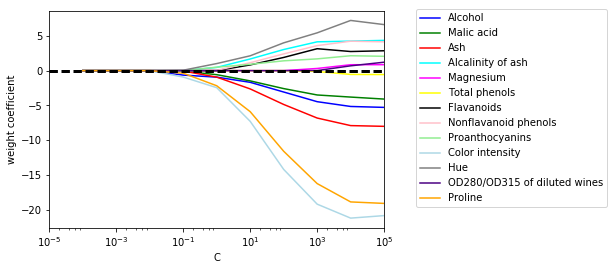

In [49]:
# -------------- feature reduction --------------------------
# L1 penalty 
# plot the regularization path: 
# the weight coefficients of the different features for different regularization strengths

fig = plt.figure()
ax = plt.subplot(111)    # "1x1 grid, first subplot"

colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
         'pink', 'lightgreen', 'lightblue', 
         'gray', 'indigo', 'orange']

weights, params = [], []
for c in range(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

# all features weights will be zero if we penalize the 
# model with a strong regularization parameter ( 0.1 C < ); 
# C is the inverse of the regularization parameter λ